In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [7]:
DATADIR = "Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

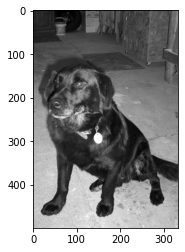

In [8]:
for category in CATEGORIES:  # dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph
        plt.show()  # display
        break  
    break 

In [19]:
#print(img_array)

In [10]:
print(img_array.shape)

(500, 333)


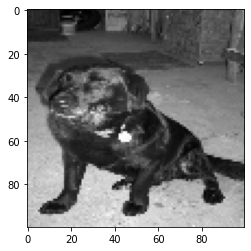

In [21]:
# reshape size of the image

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # 0=dog 1=cat to classify

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:09<00:00, 1268.97it/s]

24946


In [14]:
# shuffle the data

import random

random.shuffle(training_data)

In [23]:
# check the shuffling 

for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
0
1
0
1


In [16]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[  3]
   [ 11]
   [ 22]
   ...
   [137]
   [162]
   [162]]

  [[ 21]
   [ 10]
   [ 18]
   ...
   [137]
   [156]
   [165]]

  [[ 98]
   [ 63]
   [ 48]
   ...
   [136]
   [152]
   [167]]

  ...

  [[155]
   [157]
   [156]
   ...
   [ 15]
   [ 21]
   [ 22]]

  [[155]
   [156]
   [156]
   ...
   [  8]
   [  7]
   [ 10]]

  [[157]
   [155]
   [155]
   ...
   [ 18]
   [  4]
   [ 10]]]]


In [17]:
# save data 

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
# to load again

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)